### Import Required Lbraries

In [1]:
import pandas as pd
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


### Read training data

In [2]:
#set training data and training labels
trd_list=[]
trl_list=[]

trlbl=pd.read_csv('train.txt',index_col=0,delimiter=' ',header=None)
trlbl.columns=['label']

for image_path in glob.glob("train-set\*.png"):
    #image=im.imread(image_path)
    imag=Image.open(image_path)
    imag=imag.resize((32,32),Image.ANTIALIAS)    
    trd_list.append(np.asarray(imag))
    fname=image_path.split('\\')
    trl_list.append(trlbl.get_value(fname[1],col='label'))        

train_data_orig=np.asarray(trd_list)
print(train_data_orig.shape)
train_label_orig=np.array(trl_list)
train_label_orig=train_label_orig.reshape(train_label_orig.shape[0],-1)
print(train_label_orig.shape)

#train_label_orig=train_label_orig.T

C:\Users\sabarish\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


(37882, 32, 32)
(37882, 1)


y = 0


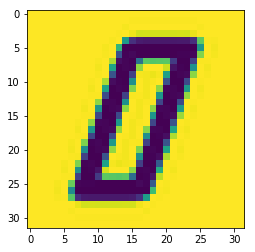

In [3]:
# Example of a picture
index = 3
plt.imshow(train_data_orig[index])
print ("y = " + str(np.squeeze(train_label_orig[index])))

### Read Validation data

In [4]:
#read validation data
vd_list=[]
vl_list=[]

vlbl=pd.read_csv('vali.txt',index_col=0,delimiter=' ',header=None)
vlbl.columns=['label']

for image_path in glob.glob("vali-set\*.png"):
    imag=Image.open(image_path)
    imag=imag.resize((32,32),Image.ANTIALIAS)
    vd_list.append(np.asarray(imag))
    fname=image_path.split('\\')
    #print(fname)
    vl_list.append(vlbl.get_value(fname[1],col='label'))

vali_data_orig=np.array(vd_list)
print(vali_data_orig.shape)
vali_label_orig=np.array(vl_list)
vali_label_orig=vali_label_orig.reshape(vali_label_orig.shape[0],-1)
print(vali_label_orig.shape)
#vali_label_orig=vali_label_orig.T


C:\Users\sabarish\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


(6262, 32, 32)
(6262, 1)


### Exploratory Analysis to understand the data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

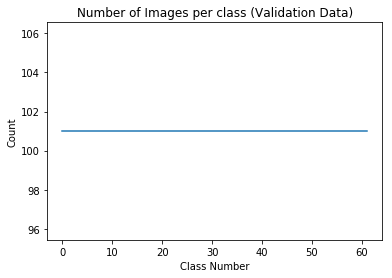

In [5]:
#Validation Data
Vali_df = pd.DataFrame({'Class_Number':vl_list})
ax = Vali_df.groupby('Class_Number').size().plot(title = 'Number of Images per class (Validation Data)', kind = 'line', y='count') #Count on each Label
ax.set_xlabel("Class Number")
ax.set_ylabel("Count")
Vali_df.Class_Number.unique()  # List of unique Labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

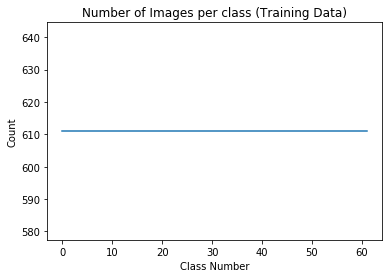

In [6]:
#Validation Data
train_df = pd.DataFrame({'Class_Number':trl_list})
ax = train_df.groupby('Class_Number').size().plot(title = 'Number of Images per class (Training Data)', kind = 'line', y='count') #Count on each Label
ax.set_xlabel("Class Number")
ax.set_ylabel("Count")
train_df.Class_Number.unique()  # List of unique Labels

### Reading Testing Data

In [7]:
# Test data
test_data=[]
image_name=[]

for image_path in glob.glob("test_set\*.png"):
    imag=Image.open(image_path)
    imag=imag.resize((64,64),Image.ANTIALIAS)
    test_data.append(np.asarray(imag))
    fname=image_path.split('\\')    
    image_name.append(fname[1])

test_data_orig=np.array(test_data)
print("test image data shape",test_data_orig.shape)
image_name_orig=pd.DataFrame(np.array(image_name))
print("image name list shape",image_name_orig.shape)

test image data shape (18848, 64, 64)
image name list shape (18848, 1)


### Convert all the files to H5 format to upload to google drive

In [8]:
import numpy as np
import h5py
#a = np.random.random(size=(100,20))
h5f = h5py.File('train_data.h5', 'w')
h5f.create_dataset('dataset_1', data=train_data_orig)

h5f = h5py.File('train_label.h5', 'w')
h5f.create_dataset('dataset_2', data=train_label_orig)

h5f = h5py.File('vali_data.h5', 'w')
h5f.create_dataset('dataset_3', data=vali_data_orig)

h5f = h5py.File('vali_label.h5', 'w')
h5f.create_dataset('dataset_4', data=vali_label_orig)

h5f = h5py.File('test_data.h5', 'w')
h5f.create_dataset('dataset_5', data=test_data_orig)

# Save the Test Data Image names to a csv file
image_name_orig.to_csv('image_name.csv')

h5f.close()

